This is a table of crime statistics for various states in the US. The columns are as follows:   

City: the name of the state      
Murder: the murder rate per 100,000 people in the state        
Assault: the assault rate per 100,000 people in the state       
UrbanPop: the urban population of the state as a percentage of the total population      
Rape: the rape rate per 100,000 people in the state

In [129]:
# Libraries required
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Read the data from the file into a pandas dataframe
data = pd.read_csv('UsArrests.csv', dtype={
                 'City': str, 'Murder': float, 'Assault': float, 'UrbanPop': float, 'Rape': float})

# Print the head of the dataframe
data.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.0,58.0,21.2
1,Alaska,10.0,263.0,48.0,44.5
2,Arizona,8.1,294.0,80.0,31.0
3,Arkansas,8.8,190.0,50.0,19.5
4,California,9.0,276.0,91.0,40.6


We can calculate summary statistics for each column of the dataframe, and then print the summary statistics to the console. The summary statistics include the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum for each column.

In [130]:
# Calculate summary statistics for the dataframe
summary = data.describe()

# Print the summary statistics
print(summary)


         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


Check for missing values:

In [131]:
# Check for missing values in the dataframe
missing = data.isnull().sum()

# Print the number of missing values for each feature
print(missing)


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


And the datatypes:

In [132]:
# Print the data type for each feature
print(data.dtypes)


City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object


To visualise the distribution of the observations for each feature, we plot a histogram using Matplotlib:

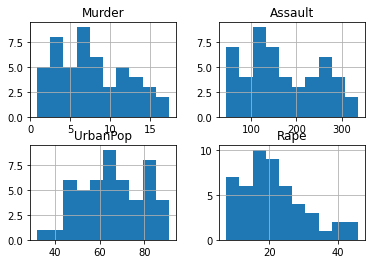

In [133]:
# Plot histograms for each feature
data.hist()

# Show the plot
plt.show()


Pandas offers a highly useful function, ``corr``, which allows us to compute correlations between the different columns. The standard correlation coefficient is the Pearson coefficient. It returns a matrix of values. It is often useful to visualise these as a plot using seaborn heatmap

C:\Users\darre\AppData\Local\Temp\ipykernel_24116\2401970728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='pearson')


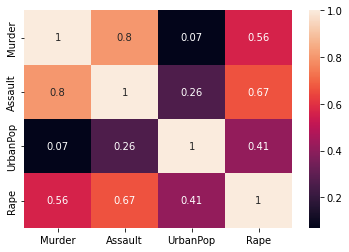

In [134]:
# Calculate the Pearson correlation coefficient for each pair of features
corr = data.corr(method='pearson')

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()


Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which our data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale

Before applying PCA to the data, it is important to preprocess the data. A common preprocessing step for PCA is standardizing the data by subtracting the mean and dividing by the standard deviation. This helps to ensure that all the features are on a similar scale and have similar variances

In [135]:
scaler = StandardScaler()
scaler.fit(data.drop('City', axis=1))
data_scaled = scaler.transform(data.drop('City', axis=1))


Next, we can create an instance of PCA and fit it to the standardized data. You can specify the number of components to retain in the transformed data. Here, we use all four columns as feature.

In [136]:
pca = PCA()
pca.fit(data_scaled)


PCA()

To check the explained variance by each principal component, we can access the explained_variance_ratio_ attribute of the PCA object

In [137]:
print(pca.explained_variance_ratio_)


[0.62 0.25 0.09 0.04]


This will give the variance explained by each principal component.

To project the data onto the new principal component space, we can call the transform() method of the PCA object, passing in the standardized data:

In [138]:
data_pca = pca.transform(data_scaled)


We can also plot the explained variance as a function of the number of principal components to get a better understanding of how much of the total variance is captured by each principal component.

Text(0, 0.5, 'Cumulative Explained Variance')

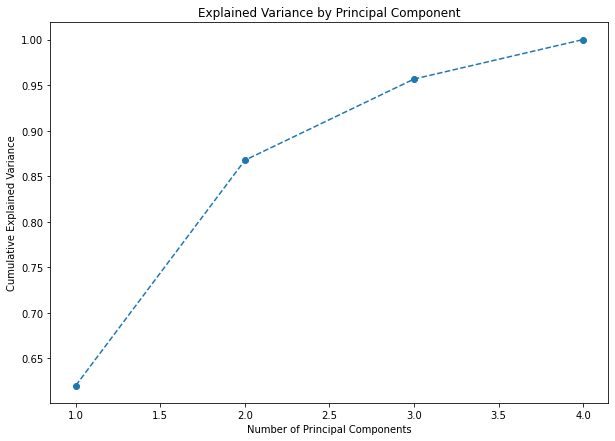

In [139]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 5), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')


In interpretation of the outcome, We can see that the first Principal Component is responsible for the highest variance in the data (approx. 73%). The second Principal Component captures additional (approx. 22%) variance, while the third and fourth principal components capture very small amounts of the remaining variance (approx. 5%).

And it can be observed that the first principal component is positively correlated with all features while the second principal component is negatively correlated with Assault, and positively correlated with UrbanPop and Rape features.

In summary, PCA can be useful in summarizing and visualizing high-dimensional data. With the use of PCA it is possible to see that even with just two principal components, most of the important information in the dataset has been captured.

Let's apply K-Means clustering to the data. The K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

In [140]:


kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

We can access the cluster labels generated by the K-Means algorithm using the labels_ attribute of the KMeans object

In [141]:
data["kmeans_cluster"] = kmeans.labels_


Next, let's apply Hierarchical Clustering to the data. Hierarchical clustering is an alternative approach to K-Means clustering for identifying groupings in the data

In [142]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(data_scaled)


AgglomerativeClustering(n_clusters=4)

We can access the cluster labels generated by the Hierarchical Clustering algorithm using the labels_ attribute of the AgglomerativeClustering object.

In [143]:
data["agg_cluster"] = agg_clustering.labels_


It is always useful to visualize the clusters in a scatter plot. This can be done by plotting each data point with the x-axis being the first principal component and the y-axis being the second principal component.

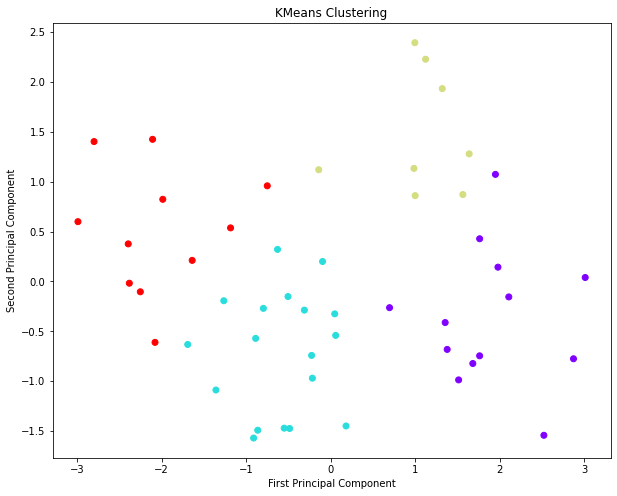

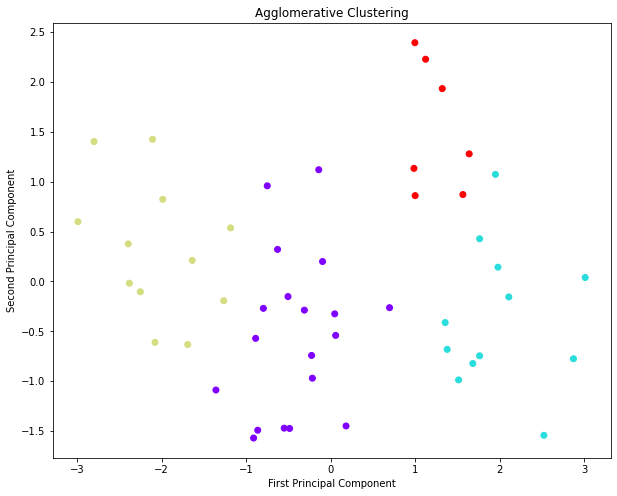

In [144]:
plt.figure(figsize=(10, 8))

plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=data["kmeans_cluster"], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("KMeans Clustering")
plt.show()

plt.figure(figsize=(10, 8))

plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=data["agg_cluster"], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Agglomerative Clustering")
plt.show()


In order to analyze the clusters, we can use some metrics such as silhouette score or calinski harabasz score to measure the performance of clustering.

In [145]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_score = silhouette_score(data_scaled, kmeans.labels_)
agg_score = silhouette_score(data_scaled, agg_clustering.labels_)

print("Silhouette score for KMeans: ", k_score)
print("Silhouette score for Hierarchical Clustering: ", agg_score)


Silhouette score for KMeans:  0.33991629616899205
Silhouette score for Hierarchical Clustering:  0.3370187183556962
